In [2]:
from nlp_data_handle import *
from transformer_debugger import *

/anaconda/envs/py38_default/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [7]:
import argparse
import sys
sys.argv = ['']
parser=argparse.ArgumentParser()
parser.add_argument('-expt_num',dest="expt_name",type=str,default="9.2.2")                        #change
parser.add_argument('-num_samples',dest="num_samples",type=int,default=1000)
parser.add_argument('-num_topics',dest="num_topics",type=int,default=10)
parser.add_argument('-num_topic_samples',dest="num_topic_samples",type=int,default=600)

parser.add_argument('-tfreq_ulim',dest="tfreq_ulim",type=float,default=1.0)
parser.add_argument('-transformer',dest="transformer",type=str,default="bert-base-uncased")
parser.add_argument('-num_epochs',dest="num_epochs",type=int)

parser.add_argument("-load_weight_exp",dest="load_weight_exp",type=str,default="9.2.2")         #change
parser.add_argument("-load_weight_epoch",dest="load_weight_epoch",type=str,default="2")         #change

parser.add_argument("-gate_weight_exp",dest="gate_weight_exp",type=str,default="9.2")           #change
parser.add_argument("-gate_weight_epoch",dest="gate_weight_epoch",type=int,default=2)           #change
parser.add_argument("-gate_var_cutoff",dest="gate_var_cutoff",type=float,default=0.25)          #change(1.0 for all)

parser.add_argument('--train_bert',default=False,action="store_true")

args=parser.parse_args()
print(args)

#Defining the Data args
data_args={}
data_args["path"] = "dataset/amazon/"
data_args["transformer_name"]=args.transformer
data_args["num_class"]=2
data_args["max_len"]=200
data_args["num_sample"]=args.num_samples
data_args["num_topic_samples"]=args.num_topic_samples
data_args["batch_size"]=32
data_args["shuffle_size"]=data_args["batch_size"]*3
data_args["cat_list"]=["arts","books","phones","clothes","groceries","movies","pets","tools"]
data_args["num_topics"]=args.num_topics
data_args["topic_list"]=list(range(data_args["num_topics"]))
data_args["per_topic_class"]=2 #Each of the topic is binary (later could have more)
data_args["tfreq_ulim"]=args.tfreq_ulim
data_args["lda_epochs"]=25
data_args["min_df"]=0.0
data_args["max_df"]=1.0

#Defining the Model args
model_args={}
model_args["expt_name"]=args.expt_name
data_args["expt_name"]=model_args["expt_name"]
model_args["load_weight_exp"]=args.load_weight_exp
model_args["load_weight_epoch"]=args.load_weight_epoch
model_args["lr"]=0.001
model_args["epochs"]=args.num_epochs
model_args["valid_split"]=0.2
model_args["train_bert"]=args.train_bert
model_args["bemb_dim"] = 768        #The dimension of bert produced last layer
model_args["shuffle_topic_batch"]=False
model_args["gate_weight_exp"]=args.gate_weight_exp
model_args["gate_weight_epoch"]=args.gate_weight_epoch
model_args["gate_var_cutoff"]=args.gate_var_cutoff

#Creating the metadata folder
meta_folder = "nlp_logs/{}".format(model_args["expt_name"])
os.makedirs(meta_folder,exist_ok=True)

Namespace(expt_name='9.2.2', gate_var_cutoff=0.25, gate_weight_epoch=2, gate_weight_exp='9.2', load_weight_epoch='2', load_weight_exp='9.2.2', num_epochs=None, num_samples=1000, num_topic_samples=600, num_topics=10, tfreq_ulim=1.0, train_bert=False, transformer='bert-base-uncased')


In [3]:
exp8p1 = evaluate_ood_indo_performance(data_args,model_args,None,None)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cat:arts	pos:1000	neg:1000	pos_avlen:226.889	neg_avlen:253.267	skips:11
Created category df for:  arts
   label  topic                                                doc  \
0      0      0  This wool might work well for crochet but for ...   
1      1      0  If you have problems with this item you might ...   
2      0      0                        The bottle leaked--all over   
3      0      0  It says it's clear, but it's not. It's like lo...   
4      0      0                I should have just went to michaels   

                                                pdoc  
0  [this, wool, might, work, well, for, crochet, ...  
1  [if, you, have, problems, with, this, item, yo...  
2                   [the, bottle, leaked, all, over]  
3  [it, says, it, s, clear, but, it, s, not, it, ...  
4        [i, should, have, just, went, to, michaels]  
cat:books	pos:1000	neg:1000	pos_avlen:288.365	neg_avlen:722.25	skips:3
Created category df for:  books
   label  topic                            

Getting ood perf of :arts	 on:arts
Getting ood perf of :arts	 on:books
Getting ood perf of :arts	 on:phones
Getting ood perf of :arts	 on:clothes
Getting ood perf of :arts	 on:groceries
Getting ood perf of :arts	 on:movies
Getting ood perf of :arts	 on:pets
Getting ood perf of :arts	 on:tools
Indomain VAcc:  tf.Tensor(0.93317974, shape=(), dtype=float32)
Outof Domain Vacc: 
[('books', <tf.Tensor: shape=(), dtype=float32, numpy=0.75345623>),
 ('phones', <tf.Tensor: shape=(), dtype=float32, numpy=0.79953915>),
 ('clothes', <tf.Tensor: shape=(), dtype=float32, numpy=0.8294931>),
 ('groceries', <tf.Tensor: shape=(), dtype=float32, numpy=0.83870965>),
 ('movies', <tf.Tensor: shape=(), dtype=float32, numpy=0.80875576>),
 ('pets', <tf.Tensor: shape=(), dtype=float32, numpy=0.82258064>),
 ('tools', <tf.Tensor: shape=(), dtype=float32, numpy=0.8663595>)]
Getting ood perf of :books	 on:arts
Getting ood perf of :books	 on:books
Getting ood perf of :books	 on:phones
Getting ood perf of :books	 on:

In [5]:
exp8p1p1 = evaluate_ood_indo_performance(data_args,model_args,None,None)

PREPARING THE GATE TO THE SHADOWS OF MORDOR


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cutoff_percent:0.75	cutoff_idx:576	cutoff_val:0.21849773824214935	num_alive:577.0


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cat:arts	pos:1000	neg:1000	pos_avlen:226.889	neg_avlen:253.267	skips:11
Created category df for:  arts
   label  topic                                                doc  \
0      1      0  This awl does not have the horrible secondary ...   
1      1      0  It's Crayola. It's 96 little sticks of classic...   
2      1      0  A nice looking book. Good way to keep recipes ...   
3      0      0  The lead is too soft- can't keep it pointed- n...   
4      0      0  Followed all the directions to a T and didn't ...   

                                                pdoc  
0  [this, awl, does, not, have, the, horrible, se...  
1  [it, s, crayola, it, s, 96, little, sticks, of...  
2  [a, nice, looking, book, good, way, to, keep, ...  
3  [the, lead, is, too, soft, can, t, keep, it, p...  
4  [followed, all, the, directions, to, a, t, and...  
cat:books	pos:1000	neg:1000	pos_avlen:288.365	neg_avlen:722.25	skips:3
Created category df for:  books
   label  topic                            

Getting ood perf of :arts	 on:arts
Getting ood perf of :arts	 on:books
Getting ood perf of :arts	 on:phones
Getting ood perf of :arts	 on:clothes
Getting ood perf of :arts	 on:groceries
Getting ood perf of :arts	 on:movies
Getting ood perf of :arts	 on:pets
Getting ood perf of :arts	 on:tools
Indomain VAcc:  tf.Tensor(0.91935486, shape=(), dtype=float32)
Outof Domain Vacc: 
[('books', <tf.Tensor: shape=(), dtype=float32, numpy=0.83870965>),
 ('phones', <tf.Tensor: shape=(), dtype=float32, numpy=0.7764977>),
 ('clothes', <tf.Tensor: shape=(), dtype=float32, numpy=0.79953915>),
 ('groceries', <tf.Tensor: shape=(), dtype=float32, numpy=0.7903226>),
 ('movies', <tf.Tensor: shape=(), dtype=float32, numpy=0.84792626>),
 ('pets', <tf.Tensor: shape=(), dtype=float32, numpy=0.797235>),
 ('tools', <tf.Tensor: shape=(), dtype=float32, numpy=0.83179724>)]
Getting ood perf of :books	 on:arts
Getting ood perf of :books	 on:books
Getting ood perf of :books	 on:phones
Getting ood perf of :books	 on:cl

In [7]:
exp8p1p2 = evaluate_ood_indo_performance(data_args,model_args,None,None)

PREPARING THE GATE TO THE SHADOWS OF MORDOR


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cutoff_percent:0.5	cutoff_idx:384	cutoff_val:0.18863919377326965	num_alive:385.0


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cat:arts	pos:1000	neg:1000	pos_avlen:226.889	neg_avlen:253.267	skips:11
Created category df for:  arts
   label  topic                                                doc  \
0      0      0  I liked the kit was very disappointed that the...   
1      1      0  it is the best paper it isn't slippery, I have...   
2      1      0  I bought this elsewhere but I had this pack wh...   
3      1      0  An excellent product, worth the cost.  It work...   
4      0      0  While I usually love prisma colored pencils fo...   

                                                pdoc  
0  [i, liked, the, kit, was, very, disappointed, ...  
1  [it, is, the, best, paper, it, isn, t, slipper...  
2  [i, bought, this, elsewhere, but, i, had, this...  
3  [an, excellent, product, worth, the, cost, it,...  
4  [while, i, usually, love, prisma, colored, pen...  
cat:books	pos:1000	neg:1000	pos_avlen:288.365	neg_avlen:722.25	skips:3
Created category df for:  books
   label  topic                            

Getting ood perf of :arts	 on:arts
Getting ood perf of :arts	 on:books
Getting ood perf of :arts	 on:phones
Getting ood perf of :arts	 on:clothes
Getting ood perf of :arts	 on:groceries
Getting ood perf of :arts	 on:movies
Getting ood perf of :arts	 on:pets
Getting ood perf of :arts	 on:tools
Indomain VAcc:  tf.Tensor(0.8894009, shape=(), dtype=float32)
Outof Domain Vacc: 
[('books', <tf.Tensor: shape=(), dtype=float32, numpy=0.8663595>),
 ('phones', <tf.Tensor: shape=(), dtype=float32, numpy=0.8110599>),
 ('clothes', <tf.Tensor: shape=(), dtype=float32, numpy=0.7764977>),
 ('groceries', <tf.Tensor: shape=(), dtype=float32, numpy=0.8248848>),
 ('movies', <tf.Tensor: shape=(), dtype=float32, numpy=0.87788016>),
 ('pets', <tf.Tensor: shape=(), dtype=float32, numpy=0.7880184>),
 ('tools', <tf.Tensor: shape=(), dtype=float32, numpy=0.7511521>)]
Getting ood perf of :books	 on:arts
Getting ood perf of :books	 on:books
Getting ood perf of :books	 on:phones
Getting ood perf of :books	 on:cloth

In [9]:
def plot_cat_performance(axes,exp_vacc,domain_name,expt_name):
    indo_vacc, ood_vacc = exp_vacc
    
    domain_indo = []
    domain_ood_mean = []
    domain_ood_std = []
    for dname in domain_name:
        domain_indo.append(indo_vacc[dname].numpy())
        
        #Now getting the ood vacc
        d_ood_list = [vacc.numpy() for _,vacc in ood_vacc[dname]]
        d_ood_mean = np.mean(d_ood_list)
        d_ood_std = np.std(d_ood_list)
        
        domain_ood_mean.append(d_ood_mean)
        domain_ood_std.append(d_ood_std)
    
    #Now we will plot the result
    xval = list(range(len(domain_name)))
    axes[0].plot(xval,domain_indo,"o-",alpha=0.8,label=expt_name)
    axes[1].errorbar(xval,domain_ood_mean,yerr=domain_ood_std,fmt='o-',alpha=0.8,label=expt_name)
    
    axes[0].set_xticks(xval)
    axes[1].set_xticks(xval)
    
    axes[0].set_xticklabels(domain_name)
    axes[1].set_xticklabels(domain_name)
    
    axes[0].legend()
    axes[1].legend()
    
    axes[0].grid()
    axes[1].grid()
    
    axes[0].set_ylim([0,1.02])
    axes[1].set_ylim([0,1.02])
    
    axes[0].set_title("In-Domain Performance (valid acc on self)")
    axes[1].set_title("Out-Of-Domain Performance (mean valid acc on rest)")



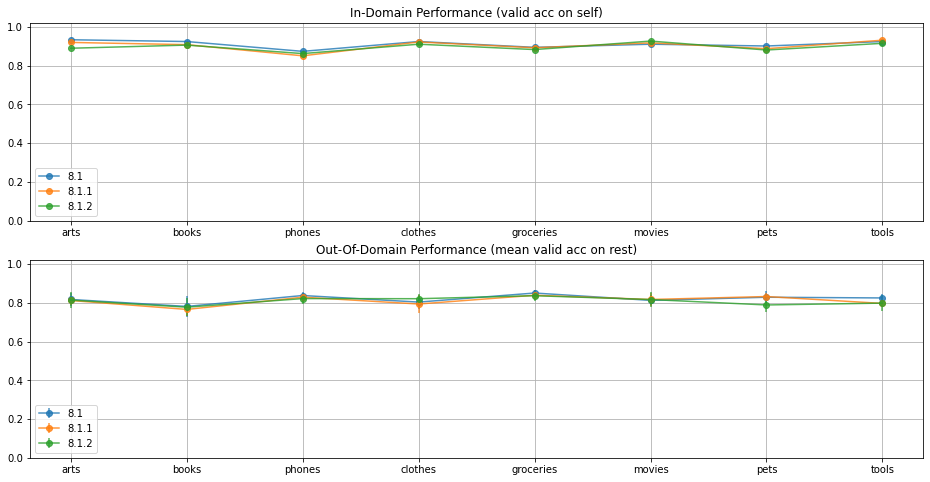

In [36]:
#Plotting the accuracy
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]


fig,axes = plt.subplots(2,1)
domain_name = data_args["cat_list"]
plot_cat_performance(axes,exp8p1,domain_name,"8.1")
plot_cat_performance(axes,exp8p1p1,domain_name,"8.1.1")
plot_cat_performance(axes,exp8p1p2,domain_name,"8.1.2")

In [17]:
plt.show()

In [19]:
exp9p1 = evaluate_ood_indo_performance(data_args,model_args,None,None)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cat:arts	pos:1000	neg:1000	pos_avlen:226.889	neg_avlen:253.267	skips:11
Created category df for:  arts
   label  topic                                                doc  \
0      0      0  The eye of the needle is too small for embroid...   
1      1      0                             good, just as expected   
2      1      0  Good student quality for a beginner and nice s...   
3      1      0                            The best paints and kit   
4      1      0                                      its good item   

                                                pdoc  
0  [the, eye, of, the, needle, is, too, small, fo...  
1                         [good, just, as, expected]  
2  [good, student, quality, for, a, beginner, and...  
3                      [the, best, paints, and, kit]  
4                                  [its, good, item]  
cat:books	pos:1000	neg:1000	pos_avlen:288.365	neg_avlen:722.25	skips:3
Created category df for:  books
   label  topic                            

Getting ood perf of :arts	 on:arts
Getting ood perf of :arts	 on:books
Getting ood perf of :arts	 on:phones
Getting ood perf of :arts	 on:clothes
Getting ood perf of :arts	 on:groceries
Getting ood perf of :arts	 on:movies
Getting ood perf of :arts	 on:pets
Getting ood perf of :arts	 on:tools
Indomain VAcc:  tf.Tensor(0.921659, shape=(), dtype=float32)
Outof Domain Vacc: 
[('books', <tf.Tensor: shape=(), dtype=float32, numpy=0.8341014>),
 ('phones', <tf.Tensor: shape=(), dtype=float32, numpy=0.859447>),
 ('clothes', <tf.Tensor: shape=(), dtype=float32, numpy=0.87788016>),
 ('groceries', <tf.Tensor: shape=(), dtype=float32, numpy=0.875576>),
 ('movies', <tf.Tensor: shape=(), dtype=float32, numpy=0.85714287>),
 ('pets', <tf.Tensor: shape=(), dtype=float32, numpy=0.8548387>),
 ('tools', <tf.Tensor: shape=(), dtype=float32, numpy=0.8732719>)]
Getting ood perf of :books	 on:arts
Getting ood perf of :books	 on:books
Getting ood perf of :books	 on:phones
Getting ood perf of :books	 on:clothes

In [21]:
exp9p1p1 = evaluate_ood_indo_performance(data_args,model_args,None,None)

PREPARING THE GATE TO THE SHADOWS OF MORDOR


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cutoff_percent:0.75	cutoff_idx:576	cutoff_val:0.2186378687620163	num_alive:577.0


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cat:arts	pos:1000	neg:1000	pos_avlen:226.889	neg_avlen:253.267	skips:11
Created category df for:  arts
   label  topic                                                doc  \
0      0      0  I had been using this brush for just around 2 ...   
1      1      0  Worked really well to hand-punch holes to bind...   
2      0      0             Hardly left a mark. Needs more clarity   
3      0      0  I am giving this product ONE star to call atte...   
4      1      0  I had checked this quilting book out of the li...   

                                                pdoc  
0  [i, had, been, using, this, brush, for, just, ...  
1  [worked, really, well, to, hand, punch, holes,...  
2      [hardly, left, a, mark, needs, more, clarity]  
3  [i, am, giving, this, product, one, star, to, ...  
4  [i, had, checked, this, quilting, book, out, o...  
cat:books	pos:1000	neg:1000	pos_avlen:288.365	neg_avlen:722.25	skips:3
Created category df for:  books
   label  topic                            

Getting ood perf of :arts	 on:arts
Getting ood perf of :arts	 on:books
Getting ood perf of :arts	 on:phones
Getting ood perf of :arts	 on:clothes
Getting ood perf of :arts	 on:groceries
Getting ood perf of :arts	 on:movies
Getting ood perf of :arts	 on:pets
Getting ood perf of :arts	 on:tools
Indomain VAcc:  tf.Tensor(0.89400923, shape=(), dtype=float32)
Outof Domain Vacc: 
[('books', <tf.Tensor: shape=(), dtype=float32, numpy=0.82718897>),
 ('phones', <tf.Tensor: shape=(), dtype=float32, numpy=0.8294931>),
 ('clothes', <tf.Tensor: shape=(), dtype=float32, numpy=0.88018435>),
 ('groceries', <tf.Tensor: shape=(), dtype=float32, numpy=0.89631337>),
 ('movies', <tf.Tensor: shape=(), dtype=float32, numpy=0.9147465>),
 ('pets', <tf.Tensor: shape=(), dtype=float32, numpy=0.8917051>),
 ('tools', <tf.Tensor: shape=(), dtype=float32, numpy=0.8548387>)]
Getting ood perf of :books	 on:arts
Getting ood perf of :books	 on:books
Getting ood perf of :books	 on:phones
Getting ood perf of :books	 on:cl

In [24]:
exp9p1p2 = evaluate_ood_indo_performance(data_args,model_args,None,None)

PREPARING THE GATE TO THE SHADOWS OF MORDOR


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cutoff_percent:0.5	cutoff_idx:384	cutoff_val:0.18584813177585602	num_alive:385.0


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cat:arts	pos:1000	neg:1000	pos_avlen:226.889	neg_avlen:253.267	skips:11
Created category df for:  arts
   label  topic                                                doc  \
0      1      0  A fresh box of crayons is a magical thing and ...   
1      1      0  These are good quality student grade watercolo...   
2      1      0  I wish the red in this set was a little darker...   
3      0      0  Great color and very soft but was completely t...   
4      1      0  Great little watercolor set for travel.  Reall...   

                                                pdoc  
0  [a, fresh, box, of, crayons, is, a, magical, t...  
1  [these, are, good, quality, student, grade, wa...  
2  [i, wish, the, red, in, this, set, was, a, lit...  
3  [great, color, and, very, soft, but, was, comp...  
4  [great, little, watercolor, set, for, travel, ...  
cat:books	pos:1000	neg:1000	pos_avlen:288.365	neg_avlen:722.25	skips:3
Created category df for:  books
   label  topic                            

Getting ood perf of :arts	 on:arts
Getting ood perf of :arts	 on:books
Getting ood perf of :arts	 on:phones
Getting ood perf of :arts	 on:clothes
Getting ood perf of :arts	 on:groceries
Getting ood perf of :arts	 on:movies
Getting ood perf of :arts	 on:pets
Getting ood perf of :arts	 on:tools
Indomain VAcc:  tf.Tensor(0.9308756, shape=(), dtype=float32)
Outof Domain Vacc: 
[('books', <tf.Tensor: shape=(), dtype=float32, numpy=0.8663595>),
 ('phones', <tf.Tensor: shape=(), dtype=float32, numpy=0.7741935>),
 ('clothes', <tf.Tensor: shape=(), dtype=float32, numpy=0.8456221>),
 ('groceries', <tf.Tensor: shape=(), dtype=float32, numpy=0.8663595>),
 ('movies', <tf.Tensor: shape=(), dtype=float32, numpy=0.88018435>),
 ('pets', <tf.Tensor: shape=(), dtype=float32, numpy=0.8364055>),
 ('tools', <tf.Tensor: shape=(), dtype=float32, numpy=0.875576>)]
Getting ood perf of :books	 on:arts
Getting ood perf of :books	 on:books
Getting ood perf of :books	 on:phones
Getting ood perf of :books	 on:clothe

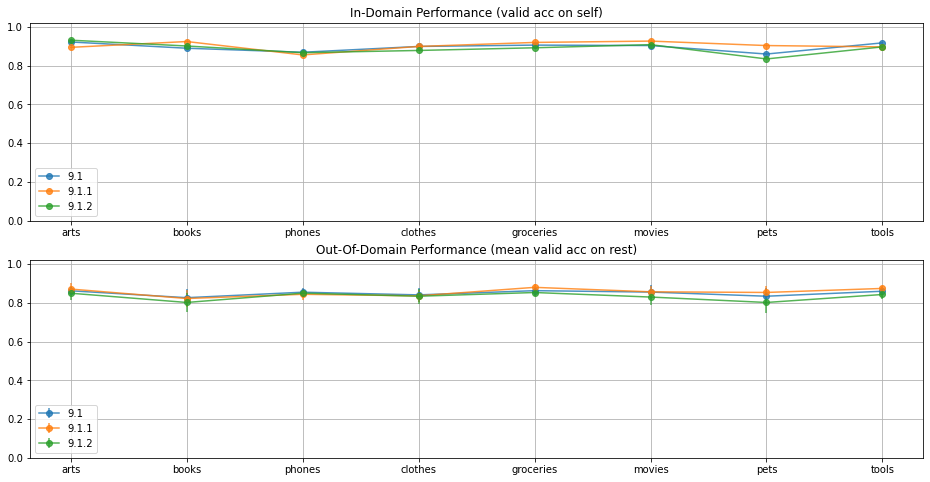

In [37]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]


fig,axes = plt.subplots(2,1)
domain_name = data_args["cat_list"]
plot_cat_performance(axes,exp9p1,domain_name,"9.1")
plot_cat_performance(axes,exp9p1p1,domain_name,"9.1.1")
plot_cat_performance(axes,exp9p1p2,domain_name,"9.1.2")

In [4]:
exp9p2 = evaluate_ood_indo_performance(data_args,model_args,None,None)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cat:arts	pos:1000	neg:1000	pos_avlen:226.889	neg_avlen:253.267	skips:11
Created category df for:  arts
   label  topic                                                doc  \
0      0      0  Sad -- mine came broken which doesn't really s...   
1      1      0  The Ultimate 3-in-1 Color Tool is excellent fo...   
2      0      0                                   NOT A GREAT FOOT   
3      1      0  Great ruler! Quilts come together in a flash- ...   
4      1      0                                  great little tool   

                                                pdoc  
0  [sad, mine, came, broken, which, doesn, t, rea...  
1  [the, ultimate, 3, in, 1, color, tool, is, exc...  
2                              [not, a, great, foot]  
3  [great, ruler, quilts, come, together, in, a, ...  
4                              [great, little, tool]  
cat:books	pos:1000	neg:1000	pos_avlen:288.365	neg_avlen:722.25	skips:3
Created category df for:  books
   label  topic                            

Getting ood perf of :arts	 on:arts
Getting ood perf of :arts	 on:books
Getting ood perf of :arts	 on:phones
Getting ood perf of :arts	 on:clothes
Getting ood perf of :arts	 on:groceries
Getting ood perf of :arts	 on:movies
Getting ood perf of :arts	 on:pets
Getting ood perf of :arts	 on:tools
Indomain VAcc:  tf.Tensor(0.9308756, shape=(), dtype=float32)
Outof Domain Vacc: 
[('books', <tf.Tensor: shape=(), dtype=float32, numpy=0.8894009>),
 ('phones', <tf.Tensor: shape=(), dtype=float32, numpy=0.813364>),
 ('clothes', <tf.Tensor: shape=(), dtype=float32, numpy=0.875576>),
 ('groceries', <tf.Tensor: shape=(), dtype=float32, numpy=0.8732719>),
 ('movies', <tf.Tensor: shape=(), dtype=float32, numpy=0.88018435>),
 ('pets', <tf.Tensor: shape=(), dtype=float32, numpy=0.8663595>),
 ('tools', <tf.Tensor: shape=(), dtype=float32, numpy=0.8894009>)]
Getting ood perf of :books	 on:arts
Getting ood perf of :books	 on:books
Getting ood perf of :books	 on:phones
Getting ood perf of :books	 on:clothes

In [6]:
exp9p2p1 = evaluate_ood_indo_performance(data_args,model_args,None,None)

PREPARING THE GATE TO THE SHADOWS OF MORDOR


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cutoff_percent:0.75	cutoff_idx:576	cutoff_val:0.2194516360759735	num_alive:577.0


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cat:arts	pos:1000	neg:1000	pos_avlen:226.889	neg_avlen:253.267	skips:11
Created category df for:  arts
   label  topic                                                doc  \
0      0      0  I was disappointed in the performance of this ...   
1      0      0  Very sad I cannot see too small cross because ...   
2      1      0  A fresh box of crayons is a magical thing and ...   
3      0      0  These are useless.  They don't actually mark a...   
4      0      0  Edit 2/14/18: reduced to 2 stars. All the pens...   

                                                pdoc  
0  [i, was, disappointed, in, the, performance, o...  
1  [very, sad, i, cannot, see, too, small, cross,...  
2  [a, fresh, box, of, crayons, is, a, magical, t...  
3  [these, are, useless, they, don, t, actually, ...  
4  [edit, 2, 14, 18, reduced, to, 2, stars, all, ...  
cat:books	pos:1000	neg:1000	pos_avlen:288.365	neg_avlen:722.25	skips:3
Created category df for:  books
   label  topic                            

Getting ood perf of :arts	 on:arts
Getting ood perf of :arts	 on:books
Getting ood perf of :arts	 on:phones
Getting ood perf of :arts	 on:clothes
Getting ood perf of :arts	 on:groceries
Getting ood perf of :arts	 on:movies
Getting ood perf of :arts	 on:pets
Getting ood perf of :arts	 on:tools
Indomain VAcc:  tf.Tensor(0.9354839, shape=(), dtype=float32)
Outof Domain Vacc: 
[('books', <tf.Tensor: shape=(), dtype=float32, numpy=0.89400923>),
 ('phones', <tf.Tensor: shape=(), dtype=float32, numpy=0.8341014>),
 ('clothes', <tf.Tensor: shape=(), dtype=float32, numpy=0.89400923>),
 ('groceries', <tf.Tensor: shape=(), dtype=float32, numpy=0.8847926>),
 ('movies', <tf.Tensor: shape=(), dtype=float32, numpy=0.8917051>),
 ('pets', <tf.Tensor: shape=(), dtype=float32, numpy=0.85253453>),
 ('tools', <tf.Tensor: shape=(), dtype=float32, numpy=0.8640553>)]
Getting ood perf of :books	 on:arts
Getting ood perf of :books	 on:books
Getting ood perf of :books	 on:phones
Getting ood perf of :books	 on:clo

In [8]:
exp9p2p2 = evaluate_ood_indo_performance(data_args,model_args,None,None)

PREPARING THE GATE TO THE SHADOWS OF MORDOR


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cutoff_percent:0.25	cutoff_idx:192	cutoff_val:0.16247457265853882	num_alive:193.0


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


cat:arts	pos:1000	neg:1000	pos_avlen:226.889	neg_avlen:253.267	skips:11
Created category df for:  arts
   label  topic                                                doc  \
0      0      0  I bought this for my 8 year old daughter for C...   
1      0      0  Would have gotten 5 stars if the advertised co...   
2      1      0  If you like to take your watercolor painting o...   
3      0      0  This yarn was the worst yarn I ever bought! It...   
4      0      0  The tools and blades are great BUT the hinge o...   

                                                pdoc  
0  [i, bought, this, for, my, 8, year, old, daugh...  
1  [would, have, gotten, 5, stars, if, the, adver...  
2  [if, you, like, to, take, your, watercolor, pa...  
3  [this, yarn, was, the, worst, yarn, i, ever, b...  
4  [the, tools, and, blades, are, great, but, the...  
cat:books	pos:1000	neg:1000	pos_avlen:288.365	neg_avlen:722.25	skips:3
Created category df for:  books
   label  topic                            

Getting ood perf of :arts	 on:arts
Getting ood perf of :arts	 on:books
Getting ood perf of :arts	 on:phones
Getting ood perf of :arts	 on:clothes
Getting ood perf of :arts	 on:groceries
Getting ood perf of :arts	 on:movies
Getting ood perf of :arts	 on:pets
Getting ood perf of :arts	 on:tools
Indomain VAcc:  tf.Tensor(0.89400923, shape=(), dtype=float32)
Outof Domain Vacc: 
[('books', <tf.Tensor: shape=(), dtype=float32, numpy=0.8824885>),
 ('phones', <tf.Tensor: shape=(), dtype=float32, numpy=0.80875576>),
 ('clothes', <tf.Tensor: shape=(), dtype=float32, numpy=0.875576>),
 ('groceries', <tf.Tensor: shape=(), dtype=float32, numpy=0.8548387>),
 ('movies', <tf.Tensor: shape=(), dtype=float32, numpy=0.87788016>),
 ('pets', <tf.Tensor: shape=(), dtype=float32, numpy=0.77880186>),
 ('tools', <tf.Tensor: shape=(), dtype=float32, numpy=0.8548387>)]
Getting ood perf of :books	 on:arts
Getting ood perf of :books	 on:books
Getting ood perf of :books	 on:phones
Getting ood perf of :books	 on:clo

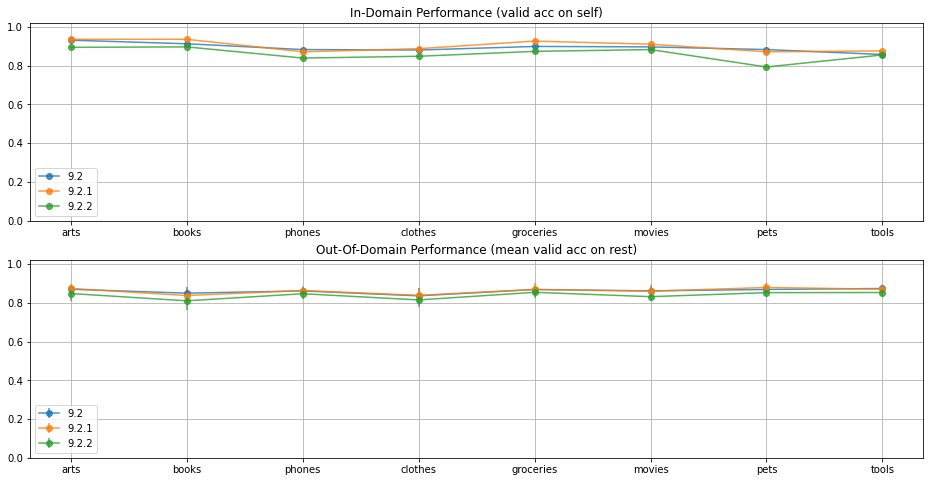

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]


fig,axes = plt.subplots(2,1)
domain_name = data_args["cat_list"]
plot_cat_performance(axes,exp9p2,domain_name,"9.2")
plot_cat_performance(axes,exp9p2p1,domain_name,"9.2.1")
plot_cat_performance(axes,exp9p2p2,domain_name,"9.2.2")